In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
code=LabelEncoder()

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

<AxesSubplot:>

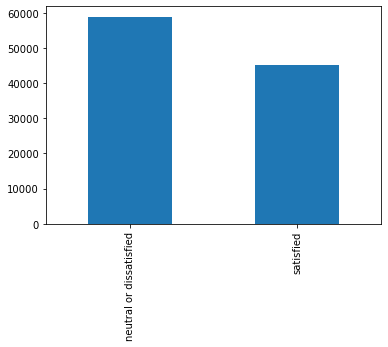

In [5]:
data["satisfaction"].value_counts().plot.bar()

In [6]:
data['satisfaction']=code.fit_transform(data['satisfaction'])

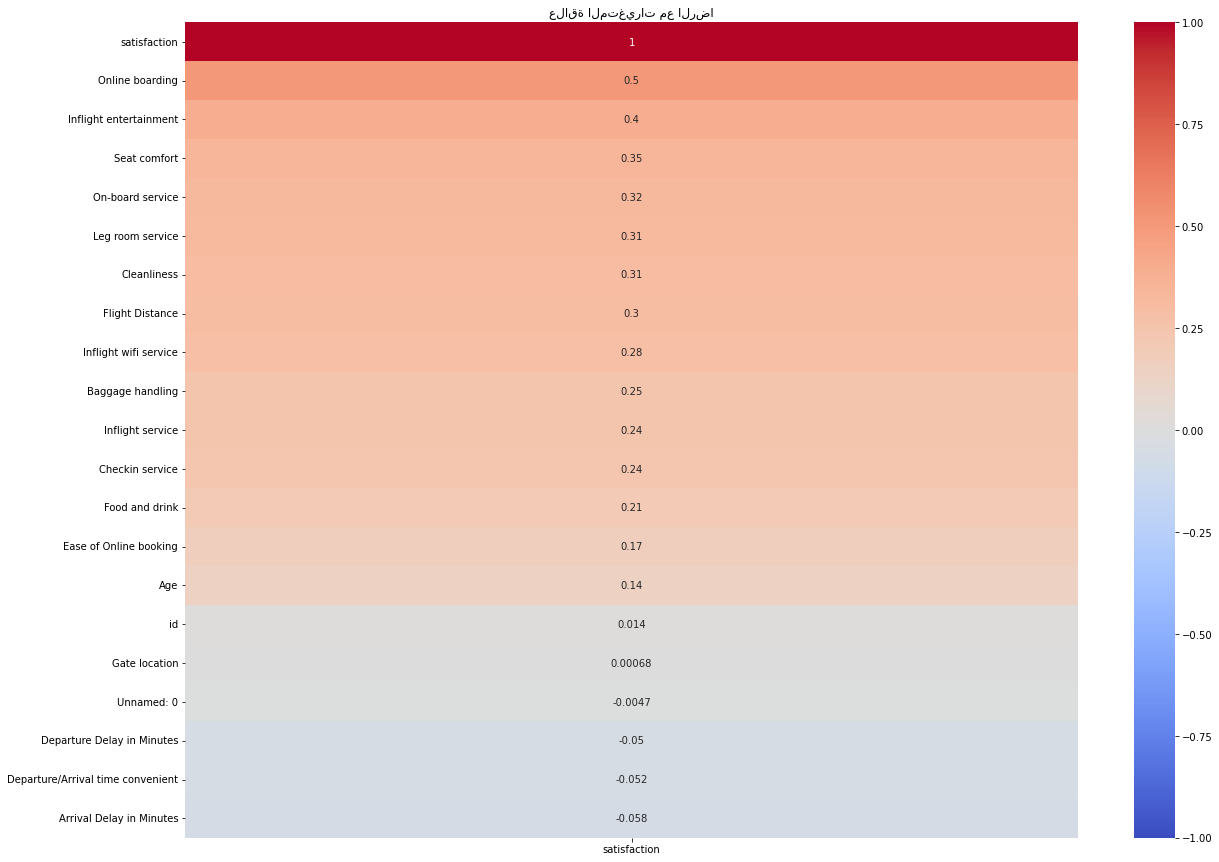

In [7]:
correlation_matrix = data.corr()

# رسم خريطة الحرارة
plt.figure(figsize=(20, 15))
sns.heatmap(
    correlation_matrix[['satisfaction']].sort_values(by='satisfaction', ascending=False),
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)
plt.title("علاقة المتغيرات مع الرضا")
plt.show()

In [8]:
data['Online boarding']

0         3
1         3
2         5
3         2
4         5
         ..
103899    2
103900    4
103901    1
103902    1
103903    1
Name: Online boarding, Length: 103904, dtype: int64

C:\Users\ALBARQSOFT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Online boarding', ylabel='Density'>

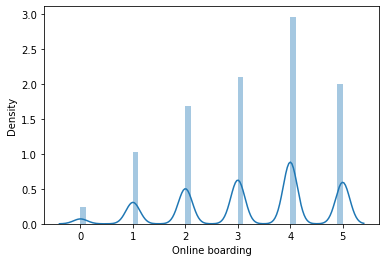

In [9]:
sns.distplot(data['Online boarding'])

C:\Users\ALBARQSOFT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inflight wifi service', ylabel='Density'>

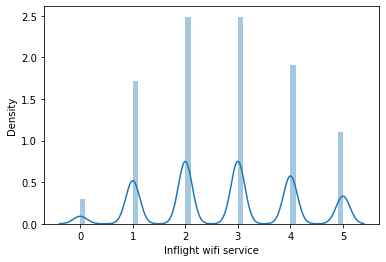

In [10]:
sns.distplot(data['Inflight wifi service'])

In [11]:
data=data.dropna()

In [12]:
data.shape

(103594, 25)

In [13]:
data['Online boarding']

0         3
1         3
2         5
3         2
4         5
         ..
103899    2
103900    4
103901    1
103902    1
103903    1
Name: Online boarding, Length: 103594, dtype: int64

In [14]:
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,...,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,51950.102274,64942.428625,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,...,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678,0.433394
std,29997.914016,37460.816597,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,...,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682,0.495546
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25960.250000,32562.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,51955.500000,64890.000000,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,77924.750000,97370.500000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [15]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [16]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [17]:

# تحديد الأعمدة النصية والرقمية
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns.difference(["Unnamed: 0", "id"]).tolist()

# 🔹 إنشاء محول يجمع بين OneHotEncoder و StandardScaler
column_transformer = make_column_transformer(
    (OneHotEncoder(drop='first', sparse=False), categorical_columns),  # تحويل القيم النصية إلى One-Hot Encoding
    (StandardScaler(), numerical_columns)  # توحيد القيم الرقمية باستخدام StandardScaler
)

# 🔹 تطبيق التحويل على البيانات
transformed_data = column_transformer.fit_transform(data)

# 🔹 تحويل النتيجة إلى DataFrame
transformed_df = pd.DataFrame(
    transformed_data,
    columns=(
        column_transformer.named_transformers_['onehotencoder'].get_feature_names_out(categorical_columns).tolist() +
        numerical_columns
    )
)

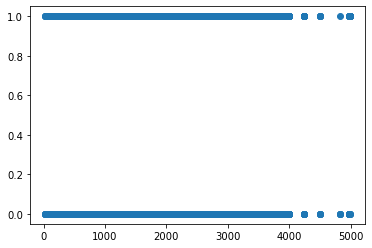

In [18]:
plt.scatter(data['Flight Distance'],data['satisfaction'])

In [19]:
columns_to_select = [
     'Online boarding',
    'Inflight entertainment',
    'Seat comfort',
    'On-board service',
    'Leg room service',
    'Cleanliness',
    'Flight Distance',
    'Inflight wifi service',
    'satisfaction'
]

In [20]:
data = data[columns_to_select]

In [21]:
X = data[[
    'Online boarding',
    'Inflight entertainment',
    'Seat comfort',
    'On-board service',
    'Leg room service',
    'Cleanliness',
    'Flight Distance',
    'Inflight wifi service'
   
]]
y = data['satisfaction']

In [22]:
data.head()

,Online boarding,Inflight entertainment,Seat comfort,On-board service,Leg room service,Cleanliness,Flight Distance,Inflight wifi service,satisfaction
0,3,5,5,4,3,5,460,3,0
1,3,1,1,1,5,1,235,3,0
2,5,5,5,4,3,5,1142,2,1
3,2,2,2,2,5,2,562,2,0
4,5,3,5,3,4,3,214,3,1


In [23]:
from sklearn.model_selection import train_test_split

X = data.drop('satisfaction', axis=1)
y = data['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("الدقة:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

الدقة: 0.9067039915053815
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     11740
           1       0.90      0.88      0.89      8979

    accuracy                           0.91     20719
   macro avg       0.91      0.90      0.90     20719
weighted avg       0.91      0.91      0.91     20719



In [26]:
from sklearn.metrics import roc_auc_score, confusion_matrix

y_probs = model.predict_proba(X_test_scaled)[:, 1]
print("AUC-ROC:", roc_auc_score(y_test, y_probs))
print("مصفوفة الارتباك:\n", confusion_matrix(y_test, y_pred))

AUC-ROC: 0.9672093345574654
مصفوفة الارتباك:
 [[10845   895]
 [ 1038  7941]]


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("أفضل معايير:", grid_search.best_params_)
best_model = grid_search.best_estimator_

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix

y_probs = best_model.predict_proba(X_test_scaled)[:, 1]
print("AUC-ROC:", roc_auc_score(y_test, y_probs))
print("مصفوفة الارتباك:\n", confusion_matrix(y_test, y_pred))

In [ ]:
importances = best_model.feature_importances_
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance.sort_values(by='Importance', ascending=False)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

In [ ]:
new1=[0,1,5,0,3,5,460,0]
new2=[3,5,5,4,3,5,460,3]

In [ ]:
best_model.predict([new1,new2])

In [ ]:
import pickle

In [ ]:
pickle.dump(best_model,open('CustomerSatisfaction','wb'))